# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


### Exercise 06.1

The scope of this exercise is to simulate a 1D Ising model composed of 50 particles of spin 1 and with the coupling constant $J$ equal to one. Two sampling methods were used for the simulations: a Metropolis algorithm and a Gibbs algorithm. Both have been implemented in the code which was given. 

After adding the possibility to restart from an old configuration, four physical quantities of the system were estimated as a function of the temperature, ranging from 0.5 to 2.0 (in LJ units). These quantities are: 
1. Internal Energy $U(N,T) = \langle H \rangle_{h=0}$
2. Heat Capacity $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. Magnetic Susceptibility $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. Magnetization $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Their evaluation is done by sampling $\langle H \rangle_{h=0}, \langle H^2 \rangle_{h=0}, \sum_{i=1,N}s_i^2$ and $\sum_{i=1,N}s_i$ using the Metropolis and Gibbs algorithms.

#### EQUILIBRATION

The system has been equilibrated by running the simulation for 1000 steps before the data collection began. Below are shown the instantaneous values of $U(N,T)$ during the equilibration phase, for both algorithms, at T = 0.5 and T = 1.5 and with no external field. For T = 1.5 only the first 400 steps are shown as the system already reached the equilibrium and the graph is more legible with fewer data points.  



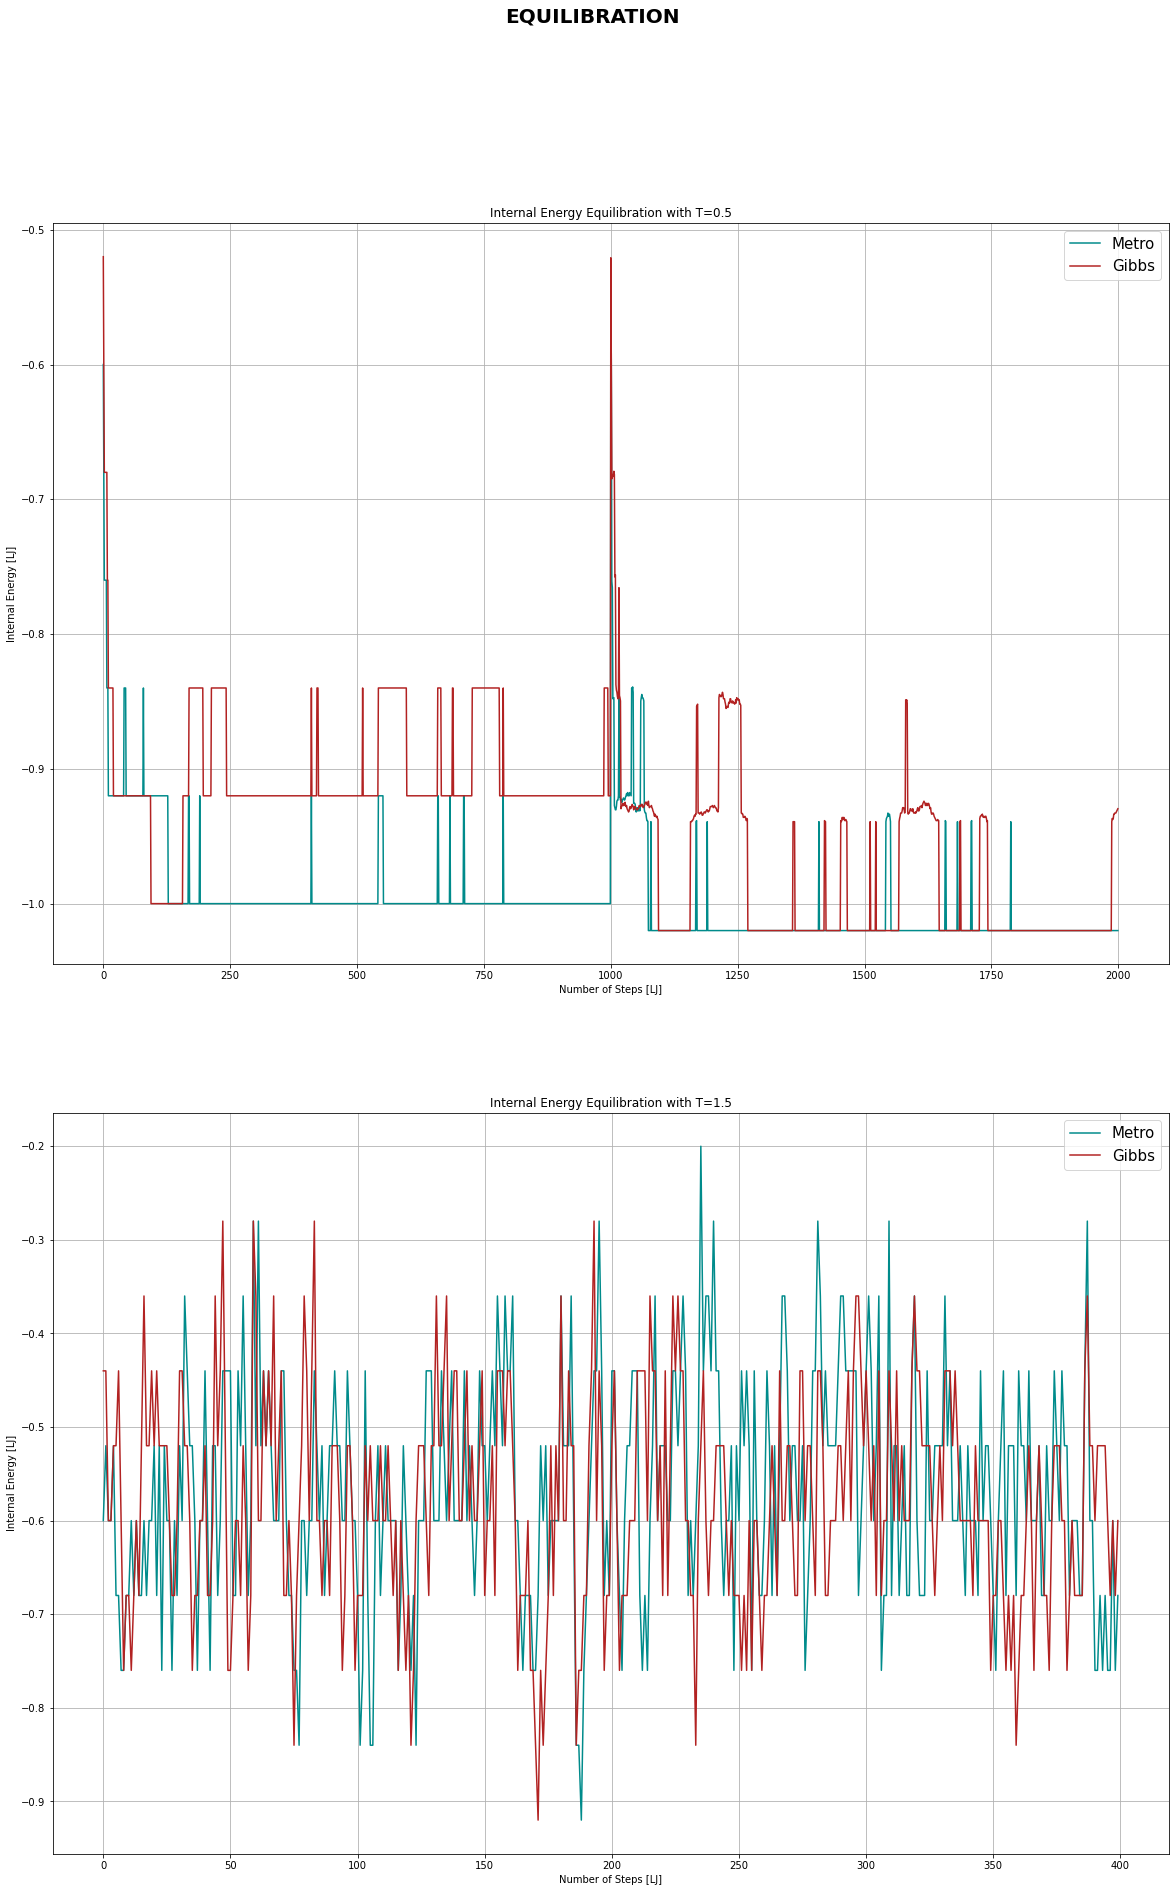

In [155]:
fig=plt.figure(figsize=(20,30))
fig.suptitle('EQUILIBRATION', fontweight = 'bold', fontsize = 20)

plt.subplot(211)

yM=np.loadtxt("Metro/Equilibration_0.500000.out", unpack=True)
xM = np.arange(yM.size)
yG=np.loadtxt("Gibbs/Equilibration_0.500000.out", unpack=True)
xG = np.arange(yG.size)
plt.plot(xM, yM, label="Metro", color = "darkcyan")
plt.plot(xG, yG, label="Gibbs", color = "firebrick")
plt.xlabel('Number of Steps [LJ]')
plt.ylabel('Internal Energy [LJ]')
plt.title("Internal Energy Equilibration with T=0.5")
plt.grid(True)
plt.legend(loc="upper right", prop={'size': 15})

plt.subplot(212)

yM=np.loadtxt("Metro/Equilibration_1.500000.out", max_rows = 400, unpack=True)
xM = np.arange(yM.size)
yG=np.loadtxt("Gibbs/Equilibration_1.500000.out", max_rows = 400, unpack=True)
xG = np.arange(yG.size)
plt.plot(xM, yM, label="Metro", color = "darkcyan")
plt.plot(xG, yG, label="Gibbs", color = "firebrick")
plt.xlabel('Number of Steps [LJ]')
plt.ylabel('Internal Energy [LJ]')
plt.title("Internal Energy Equilibration with T=1.5")
plt.grid(True)
plt.legend(loc="upper right", prop={'size': 15})


plt.show()

#### SIMULATION

The results are shown below: there is a good agreement between the simulation and the exact curves. The two curves get further from each other as the temperature lowers, but the uncertainty gets larger so they are still in agreement. The results shown for the Internal Energy, Heat Capacity and Magnetic Susceptibility are without an external magnetic field. Those of the Magnetization are with an external magnetic field of 0.02, as there is no Magnetization without an external field.

The uncertainties were calculated using the blocking method, with 20 blocks of $10^5$ steps each. The Heat Capacity shows a remarkably large uncertainty for low temperatures, likely due to it being calculated from two different averages, unlike the other quantities, so its error consists in the root of the squares of the errors on $<H>^2$ and $<H^2>$. 

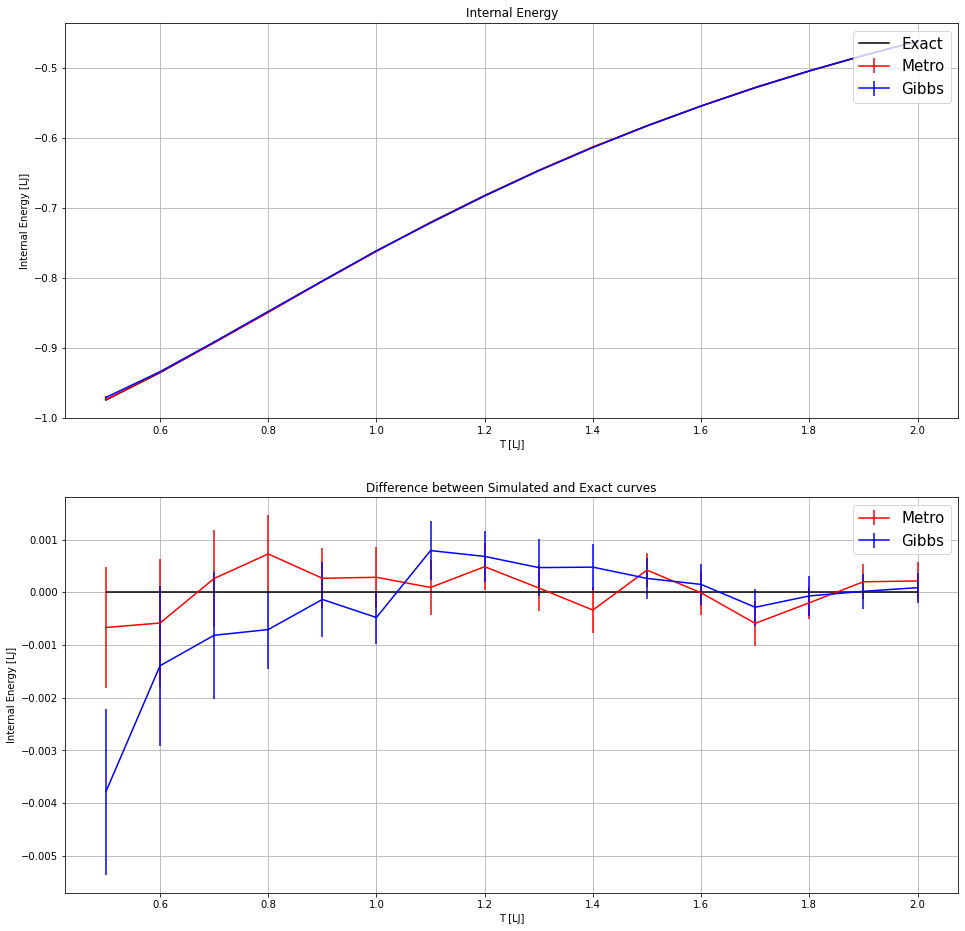

In [123]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

points=16
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )


fig=plt.figure(figsize=(16,16))

plt.subplot(211)

xM, yM, errM=np.loadtxt("Metro/output.ene_tot", usecols=(0, 1, 2), unpack=True)
xG, yG, errG=np.loadtxt("Gibbs/output.ene_tot", usecols=(0, 1, 2), unpack=True)
plt.plot(T, e, label="Exact", color = "black")
plt.errorbar(xM, yM, yerr=errM, label="Metro", color = "red")
plt.errorbar(xG, yG, yerr=errG, label="Gibbs", color = "blue")
plt.xlabel('T [LJ]')
plt.ylabel('Internal Energy [LJ]')
plt.title("Internal Energy")
plt.grid(True)
plt.legend(loc="upper right", prop={'size': 15})

plt.subplot(212)

Metro= e - yM
Gibbs= e - yG


plt.errorbar(xM, Metro, yerr=errM, label="Metro", color = "red")
plt.errorbar(xG, Gibbs, yerr=errG, label="Gibbs", color = "blue")
plt.hlines(0, 0.5, 2.0, color = "black")
plt.xlabel('T [LJ]')
plt.ylabel('Internal Energy [LJ]')
plt.title("Difference between Simulated and Exact curves")
plt.grid(True)
plt.legend(loc="upper right", prop={'size': 15})


plt.show()


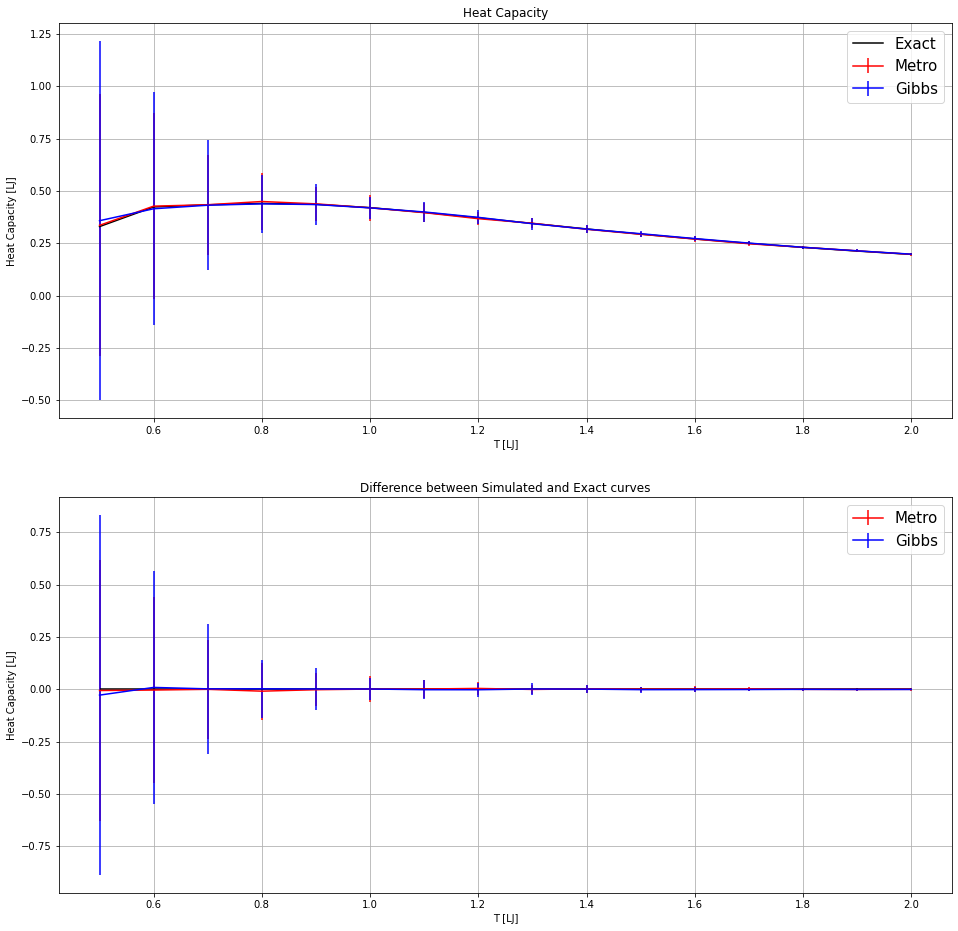

In [132]:
fig=plt.figure(figsize=(16,16))

plt.subplot(211)

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

xM, yM, errM=np.loadtxt("Metro/output.heat_tot", usecols=(0, 1, 2), unpack=True)
xG, yG, errG=np.loadtxt("Gibbs/output.heat_tot", usecols=(0, 1, 2), unpack=True)
plt.plot(T, heat, label="Exact", color = "black")
plt.errorbar(xM, yM, yerr=errM, label="Metro", color = "red")
plt.errorbar(xG, yG, yerr=errG, label="Gibbs", color = "blue")
plt.xlabel('T [LJ]')
plt.ylabel('Heat Capacity [LJ]')
plt.title("Heat Capacity")
plt.grid(True)
plt.legend(loc="upper right", prop={'size': 15})

plt.subplot(212)

Metro= heat - yM
Gibbs= heat - yG


plt.errorbar(xM, Metro, yerr=errM, label="Metro", color = "red")
plt.errorbar(xG, Gibbs, yerr=errG, label="Gibbs", color = "blue")
plt.hlines(0, 0.5, 2.0, color = "black")
plt.xlabel('T [LJ]')
plt.ylabel('Heat Capacity [LJ]')
plt.title("Difference between Simulated and Exact curves")
plt.grid(True)
plt.legend(loc="upper right", prop={'size': 15})


plt.show()

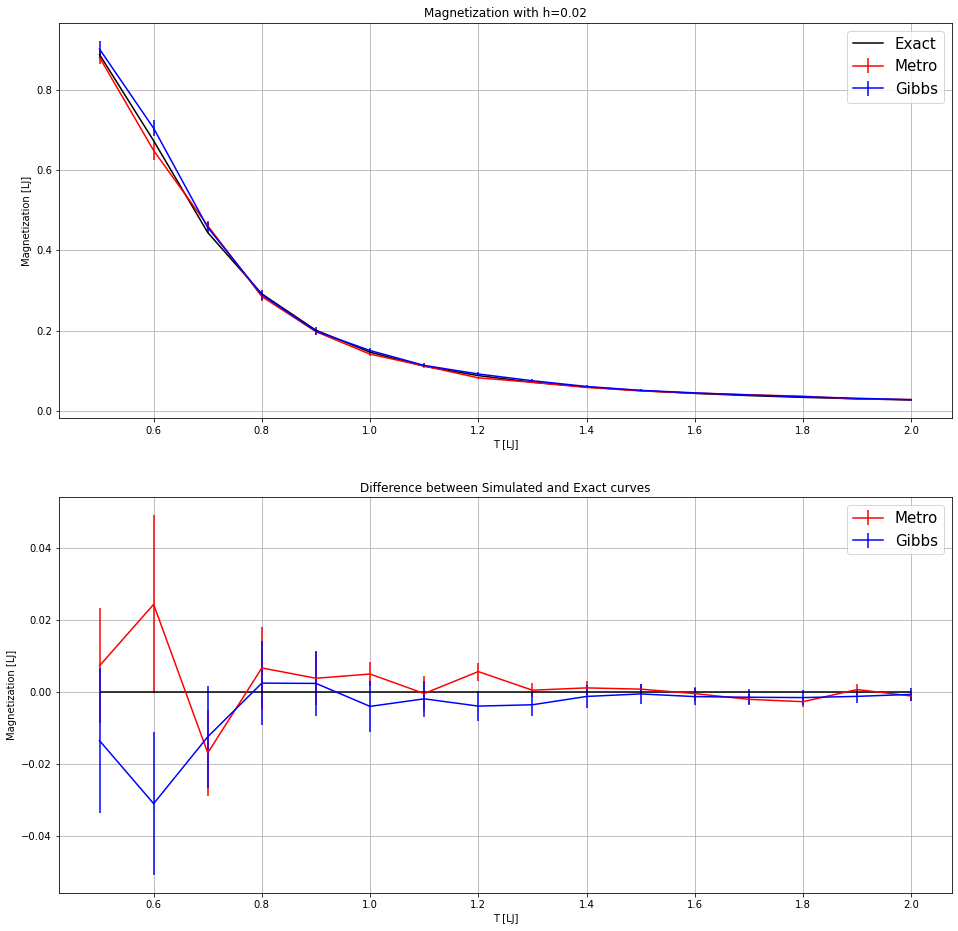

In [129]:
fig=plt.figure(figsize=(16,16))

plt.subplot(211)

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

xM, yM, errM=np.loadtxt("Metro/output.mag_tot", usecols=(0, 1, 2), unpack=True)
xG, yG, errG=np.loadtxt("Gibbs/output.mag_tot", usecols=(0, 1, 2), unpack=True)
plt.plot(T, M, label="Exact", color = "black")
plt.errorbar(xM, yM, yerr=errM, label="Metro", color = "red")
plt.errorbar(xG, yG, yerr=errG, label="Gibbs", color = "blue")
plt.xlabel('T [LJ]')
plt.ylabel('Magnetization [LJ]')
plt.title("Magnetization with h=0.02")
plt.grid(True)
plt.legend(loc="upper right", prop={'size': 15})

plt.subplot(212)

Metro= M - yM
Gibbs= M - yG


plt.errorbar(xM, Metro, yerr=errM, label="Metro", color = "red")
plt.errorbar(xG, Gibbs, yerr=errG, label="Gibbs", color = "blue")
plt.hlines(0, 0.5, 2.0, color = "black")
plt.xlabel('T [LJ]')
plt.ylabel('Magnetization [LJ]')
plt.title("Difference between Simulated and Exact curves")
plt.grid(True)
plt.legend(loc="upper right", prop={'size': 15})


plt.show()

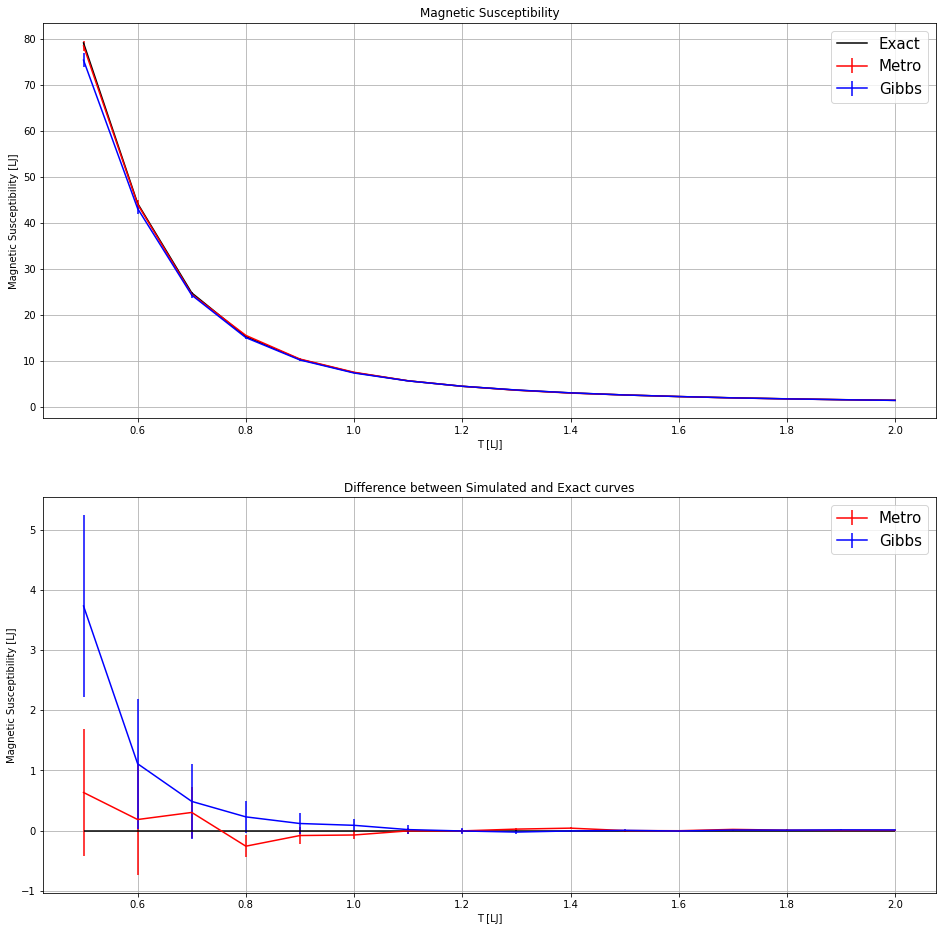

In [130]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

fig=plt.figure(figsize=(16,16))

plt.subplot(211)

xM, yM, errM=np.loadtxt("Metro/output.chi_tot", usecols=(0, 1, 2), unpack=True)
xG, yG, errG=np.loadtxt("Gibbs/output.chi_tot", usecols=(0, 1, 2), unpack=True)
plt.plot(T, X, label="Exact", color = "black")
plt.errorbar(xM, yM, yerr=errM, label="Metro", color = "red")
plt.errorbar(xG, yG, yerr=errG, label="Gibbs", color = "blue")
plt.xlabel('T [LJ]')
plt.ylabel('Magnetic Susceptibility [LJ]')
plt.title("Magnetic Susceptibility")
plt.grid(True)
plt.legend(loc="upper right", prop={'size': 15})

plt.subplot(212)

Metro= X - yM
Gibbs= X - yG


plt.errorbar(xM, Metro, yerr=errM, label="Metro", color = "red")
plt.errorbar(xG, Gibbs, yerr=errG, label="Gibbs", color = "blue")
plt.hlines(0, 0.5, 2.0, color = "black")
plt.xlabel('T [LJ]')
plt.ylabel('Magnetic Susceptibility [LJ]')
plt.title("Difference between Simulated and Exact curves")
plt.grid(True)
plt.legend(loc="upper right", prop={'size': 15})


plt.show()